In [46]:
!pip install Karateclub 

In [47]:
%matplotlib inline
import networkx as nx
from karateclub import DeepWalk 
from karateclub import Node2Vec
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


# Graph Visualization 

Number of nodes (club-members) 34


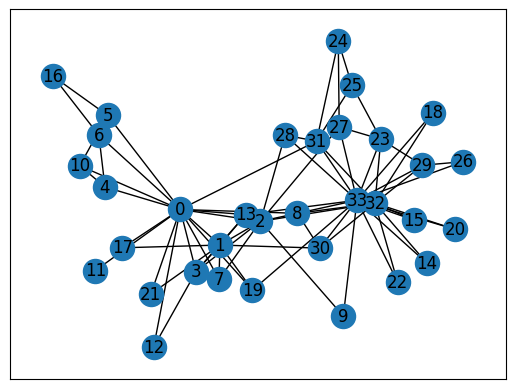

In [48]:
G = nx.karate_club_graph() # load the Zachary's karate club graph
print('Number of nodes (club-members)', len(G.nodes))
nx.draw_networkx(G)


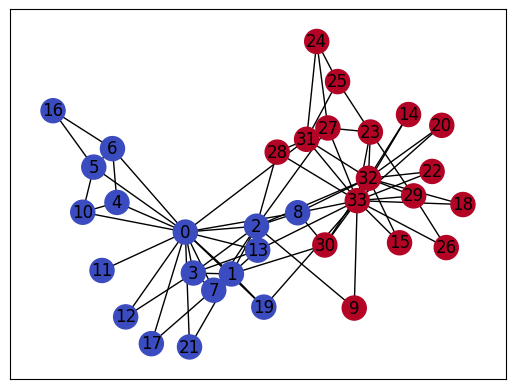

In [49]:
labels = []
for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names == 'Officer' else 0) #Clubs: 'Officer' or 'Mr.Hi'
    
layout_pos = nx.spring_layout(G)
nx.draw_networkx(G,pos = layout_pos ,node_color = labels, cmap='coolwarm')

# DeepWalk embedding

In [50]:
Deepwalk_model = DeepWalk(walk_number=10, walk_length=80, dimensions=124)
Deepwalk_model.fit(G)
embedding = Deepwalk_model.get_embedding()
print('Embedding array shape (nodes x features):',embedding.shape )

Embedding array shape (nodes x features): (34, 124)


In [51]:
embedding

array([[-0.01271764, -0.20864095,  0.14209592, ...,  0.26082504,
         0.06447003, -0.5733245 ],
       [ 0.05264996, -0.10388383,  0.14774778, ...,  0.18505444,
        -0.02499234, -0.44503233],
       [ 0.09935367, -0.04661604,  0.18282256, ...,  0.04635339,
        -0.07036491, -0.30341515],
       ...,
       [ 0.1874821 ,  0.01940789,  0.25770205, ..., -0.19030297,
        -0.23571213, -0.37163222],
       [ 0.2313532 ,  0.18491547,  0.13957407, ..., -0.25945216,
        -0.25541377,  0.06951326],
       [ 0.15742481,  0.09504495,  0.15256481, ..., -0.15806371,
        -0.20619482, -0.14288369]], dtype=float32)

## Visualization

Low dimensional embedding representaiton (nodes x 2): (34, 2)


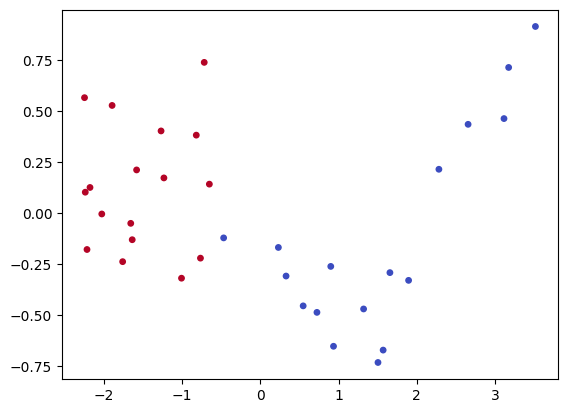

In [52]:
PCA_model = sklearn.decomposition.PCA(n_components=2)
lowdimension_embedding = PCA_model.fit_transform(embedding)
print('Low dimensional embedding representaiton (nodes x 2):', lowdimension_embedding.shape)
plt.scatter(lowdimension_embedding[:,0],lowdimension_embedding[:,1],c=labels,
            s=15,cmap='coolwarm')



# Node2Vec Global search embedding

In [53]:
" Perform node embedding using Node2Vec "
N2vec_model_global = Node2Vec(walk_number=10, walk_length=80,p=0.9 ,q=0.1,dimensions=124)
N2vec_model_global.fit(G)
N2Vec_global_embedding = N2vec_model_global.get_embedding()
print('Embedding array shape (nodes x features):',N2Vec_global_embedding.shape )

Embedding array shape (nodes x features): (34, 124)


In [54]:
N2Vec_global_embedding

array([[ 0.12511948, -0.14118809, -0.02355152, ...,  0.11909478,
        -0.1439585 , -0.18577401],
       [ 0.0056874 , -0.22794566,  0.03410146, ...,  0.08994725,
        -0.3423244 , -0.3211424 ],
       [ 0.02549257, -0.2043326 ,  0.00942768, ...,  0.10730436,
        -0.31478938, -0.31323192],
       ...,
       [-0.04832827, -0.24238867,  0.01245177, ...,  0.10810786,
        -0.41941386, -0.39337015],
       [ 0.05574298, -0.18364644, -0.06779645, ...,  0.1997333 ,
        -0.39855477, -0.41203526],
       [ 0.05080675, -0.21915057, -0.02289965, ...,  0.1864372 ,
        -0.43282518, -0.44327825]], dtype=float32)

## Visualization

Low dimensional embedding representaiton (nodes x 2): (34, 2)


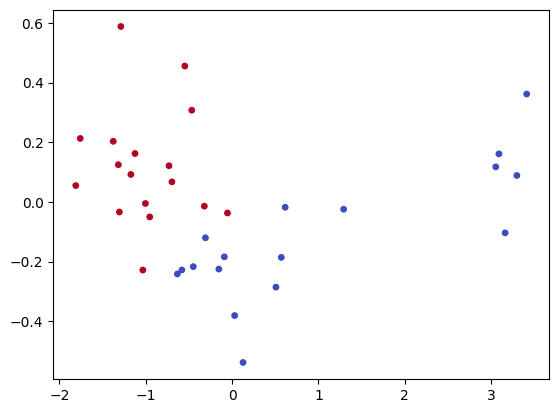

In [55]:
lowdimension_n2vembedding = PCA_model.fit_transform(N2Vec_global_embedding)
print('Low dimensional embedding representaiton (nodes x 2):', lowdimension_n2vembedding.shape)
plt.scatter(lowdimension_n2vembedding[:,0],lowdimension_n2vembedding[:,1],c=labels,
            s=15,cmap='coolwarm')

# Node2Vec Local  search embedding

In [56]:
" Perform node embedding using Node2Vec "
N2vec_model_local = Node2Vec(walk_number=10, walk_length=80,p=0.3 ,q=0.7,dimensions=124)
N2vec_model_local.fit(G)
N2Vec_local_embedding = N2vec_model_local.get_embedding()
print('Embedding array shape (nodes x features):',N2Vec_local_embedding.shape )

Embedding array shape (nodes x features): (34, 124)


In [57]:
N2Vec_local_embedding

array([[ 0.10186975, -0.13872378,  0.13797341, ...,  0.13239948,
         0.08802369, -0.27605006],
       [ 0.07701927, -0.04675822,  0.10450893, ...,  0.11010787,
        -0.07754947, -0.29382807],
       [ 0.0678335 ,  0.00728164,  0.01571164, ...,  0.06547278,
        -0.17237955, -0.23089416],
       ...,
       [ 0.03880103, -0.00287217, -0.16012165, ...,  0.04481385,
        -0.14435361, -0.2195727 ],
       [ 0.05945387,  0.01874279, -0.20914565, ...,  0.02425311,
        -0.23632519, -0.25118297],
       [ 0.03593289,  0.02581946, -0.13072363, ...,  0.02257147,
        -0.1865642 , -0.20103146]], dtype=float32)

## Visualization 

Low dimensional embedding representaiton (nodes x 2): (34, 2)


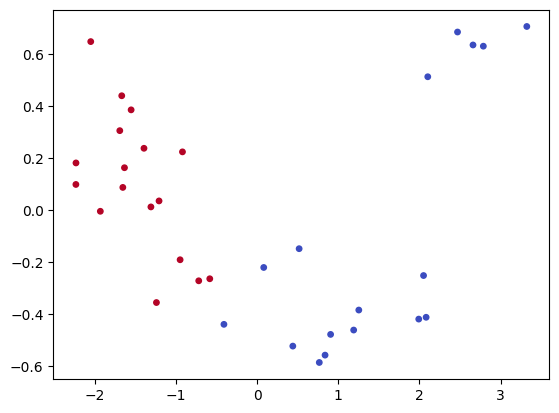

In [58]:
lowdimension_n2vembedding = PCA_model.fit_transform(N2Vec_local_embedding)
print('Low dimensional embedding representaiton (nodes x 2):', lowdimension_n2vembedding.shape)
plt.scatter(lowdimension_n2vembedding[:,0],lowdimension_n2vembedding[:,1],c=labels,
            s=15,cmap='coolwarm')

# Node Classification

## DeepWalk

In [59]:

x_train,x_test,y_train,y_test = train_test_split(embedding, labels, test_size=0.3, random_state=42)
ML_model = LogisticRegression(random_state=0).fit(x_train,y_train)
y_predict = ML_model.predict(x_test)
ML_acc = roc_auc_score(y_test,y_predict)
print('DepWalk AUC:',ML_acc)




DepWalk AUC: 0.9


## Node2Vec Global

In [60]:
nx_train,nx_test,ny_train,ny_test = train_test_split(N2Vec_global_embedding, labels, test_size=0.3, random_state=42)
nML_model = LogisticRegression(random_state=0).fit(nx_train,ny_train)
ny_predict = nML_model.predict(nx_test)
nML_acc = roc_auc_score(ny_test,ny_predict)
print('Node2Vec AUC:',nML_acc)

Node2Vec AUC: 0.8


## Node2Vec Local

In [61]:
nx_train,nx_test,ny_train,ny_test = train_test_split(N2Vec_local_embedding, labels, test_size=0.3, random_state=42)
nML_model = LogisticRegression(random_state=0).fit(nx_train,ny_train)
ny_predict = nML_model.predict(nx_test)
nML_acc = roc_auc_score(ny_test,ny_predict)
print('Node2Vec AUC:',nML_acc)

Node2Vec AUC: 1.0


# 